<a href="https://colab.research.google.com/github/totti0223/deep_learning_for_biologists_with_keras/blob/master/notebooks/flower_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#17 flowers dataset classification

![17_flowers](http://www.robots.ox.ac.uk/~vgg/data/flowers/17/categories.jpg =300x600)

## Library Import

In [0]:
import os
import shutil
from more_itertools import chunked

import matplotlib.pyplot as plt
plt.style.use('default')
import keras
from keras.utils.data_utils import get_file
from keras import layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


##Dataset Preparation

In [0]:
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
!tar -zxf 17flowers.tgz

--2019-01-10 07:45:34--  http://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60270631 (57M) [application/x-gzip]
Saving to: ‘17flowers.tgz’

17flowers.tgz       100%[===================>]  57.48M  16.2MB/s    in 3.5s    

2019-01-10 07:45:38 (16.2 MB/s) - ‘17flowers.tgz’ saved [60270631/60270631]



In [0]:
#change the limit to 17 if you want to train the whole dataset
class_limit = 4

#get list of files
_files = os.listdir("jpg")
#jpg only
_files = sorted([x for x in _files if x.endswith(".jpg")])

#to groups of 80
grouped_files = list(chunked(_files,80))[:class_limit]

#create parent directory
parent_dir = "image"
if os.path.exists(parent_dir) == False:
    os.mkdir(parent_dir)
    
#create subfolder
labels = ['Daffodil', 'Snowdrop', 'LilyValley', 'Bluebell', 'Crocus', 'Iris', 'Tigerlily', 'Tulip', 'Fritillary', 'Sunflower', 'Daisy', 'ColtsFoot', 'Dandelion', 'Cowslip', 'Buttercup', 'Windflower', 'Pansy']
print ("creating data for: ",labels[:class_limit])
for label in labels[:class_limit]:
    subfolder = os.path.join(parent_dir,label)
    if os.path.exists(subfolder) == False:
        os.mkdir(subfolder)
#copy files to subfolders
for i,files in enumerate(grouped_files):
    for file in files:
        orig = os.path.join("jpg",file)
        dest = os.path.join(parent_dir,labels[i],file)
        shutil.copy2(orig,dest)

creating data for:  ['Daffodil', 'Snowdrop', 'LilyValley', 'Bluebell']


In [0]:
for root, dirs, files in os.walk("image"):
    print(root)
    print(files)

image
[]
image/Bluebell
['image_0266.jpg', 'image_0290.jpg', 'image_0301.jpg', 'image_0267.jpg', 'image_0261.jpg', 'image_0286.jpg', 'image_0308.jpg', 'image_0295.jpg', 'image_0317.jpg', 'image_0288.jpg', 'image_0313.jpg', 'image_0279.jpg', 'image_0265.jpg', 'image_0289.jpg', 'image_0251.jpg', 'image_0273.jpg', 'image_0306.jpg', 'image_0297.jpg', 'image_0271.jpg', 'image_0298.jpg', 'image_0307.jpg', 'image_0264.jpg', 'image_0260.jpg', 'image_0256.jpg', 'image_0257.jpg', 'image_0310.jpg', 'image_0249.jpg', 'image_0263.jpg', 'image_0312.jpg', 'image_0272.jpg', 'image_0285.jpg', 'image_0296.jpg', 'image_0248.jpg', 'image_0276.jpg', 'image_0254.jpg', 'image_0253.jpg', 'image_0318.jpg', 'image_0246.jpg', 'image_0282.jpg', 'image_0283.jpg', 'image_0241.jpg', 'image_0275.jpg', 'image_0244.jpg', 'image_0302.jpg', 'image_0294.jpg', 'image_0291.jpg', 'image_0243.jpg', 'image_0270.jpg', 'image_0278.jpg', 'image_0300.jpg', 'image_0277.jpg', 'image_0247.jpg', 'image_0304.jpg', 'image_0315.jpg', 'im

### Dataset Preview

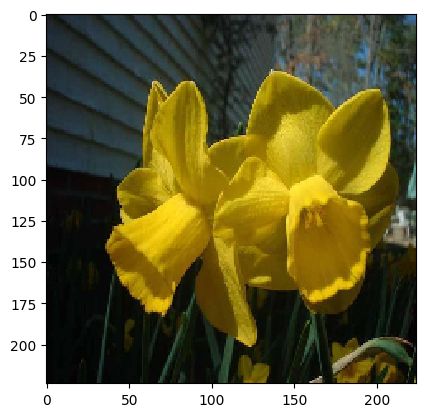

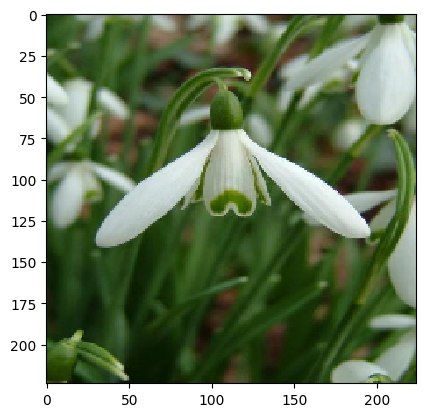

In [0]:
img = load_img("image/Daffodil/image_0020.jpg",target_size=(224,224))
x = img_to_array(img)/255.
plt.imshow(x)
plt.show()

img = load_img("image/Snowdrop/image_0082.jpg",target_size=(224,224))
x = img_to_array(img)/255.
plt.imshow(x)
plt.show()

# Training without data augmentation

In [0]:
datagen = ImageDataGenerator(rescale=1/255.,validation_split=0.2)
train_generator = datagen.flow_from_directory("image",
                                        target_size=(224,224),
                                        classes=labels[:class_limit],
                                        batch_size=16,
                                        seed=1,
                                        subset="training")

valid_generator = datagen.flow_from_directory("image",
                                        target_size=(224,224),
                                        classes=labels[:class_limit],
                                        batch_size=16,
                                        seed=1,
                                        subset="validation")

#not must, but no of images in the dataset is preferred to be dividable by the batch size

Found 256 images belonging to 4 classes.
Found 64 images belonging to 4 classes.


In [0]:
#VGG16 architecture with batchnormalization and dropout
model = Sequential([
    #feature extraction layer
    
    #block1
    layers.Conv2D(64,(3,3),padding="same",name="block1_conv1",input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(64,(3,3),padding="same",name="block1_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block1_pool"),
    #block2
    layers.Conv2D(128,(3,3),padding="same",name="block2_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(128,(3,3),padding="same",name="block2_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block2_pool"),
    #block3
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block3_pool"),

    #block4
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block4_pool"),

    #block5
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block5_pool"),

    layers.Flatten(),
    
    #inference layer
    layers.Dense(512,name="fc1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.5),
    
    layers.Dense(512,name="fc2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),    
    layers.Dropout(0.5),
    
    layers.Dense(class_limit,name="prepredictions"),
    layers.Activation("softmax",name="predictions")
    
])

model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_2 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
__________

In [0]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch= train_generator.n//train_generator.batch_size,
                              validation_data=valid_generator,
                              validation_steps= valid_generator.n//valid_generator.batch_size,
                              epochs=30)

Epoch 1/30
16/16 [==============================] - 22s 1s/step - loss: 1.4084 - acc: 0.4922 - val_loss: 9.4554 - val_acc: 0.3281
Epoch 2/30
16/16 [==============================] - 10s 623ms/step - loss: 1.0131 - acc: 0.6211 - val_loss: 8.3109 - val_acc: 0.4844
Epoch 3/30
16/16 [==============================] - 10s 623ms/step - loss: 0.7828 - acc: 0.6953 - val_loss: 0.7469 - val_acc: 0.7656
Epoch 4/30
16/16 [==============================] - 10s 629ms/step - loss: 0.6452 - acc: 0.7617 - val_loss: 0.5055 - val_acc: 0.7812
Epoch 5/30
16/16 [==============================] - 10s 628ms/step - loss: 0.5917 - acc: 0.7930 - val_loss: 1.1223 - val_acc: 0.6875
Epoch 6/30
16/16 [==============================] - 10s 630ms/step - loss: 0.6475 - acc: 0.7812 - val_loss: 0.7137 - val_acc: 0.7656
Epoch 7/30
16/16 [==============================] - 10s 631ms/step - loss: 0.5377 - acc: 0.8125 - val_loss: 1.5073 - val_acc: 0.6094
Epoch 8/30
16/16 [==============================] - 10s 634ms/step - los

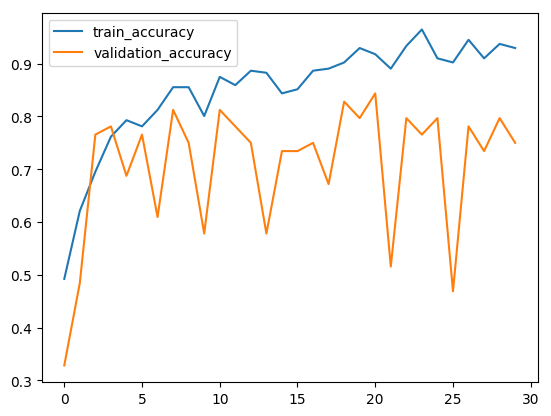

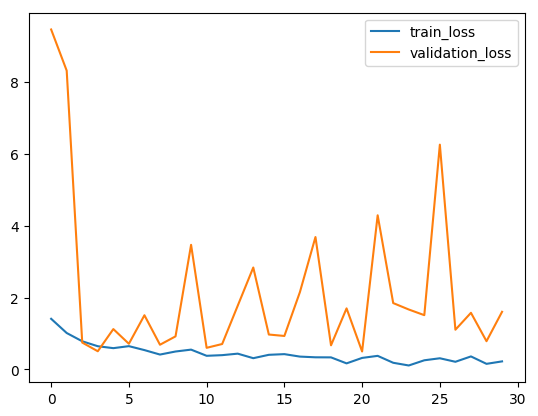

In [0]:
plt.plot(history.history["acc"],label="train_accuracy")
plt.plot(history.history["val_acc"],label="validation_accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="validation_loss")
plt.legend()
plt.show()

# Training with data augmentation

In [0]:

datagen = ImageDataGenerator(width_shift_range=0.05,
                              height_shift_range=0.05,
                             rotation_range=45,
                              rescale=1/255.,validation_split=0.2)
datagen2 = ImageDataGenerator(rescale=1/255.,validation_split=0.2)

train_generator = datagen.flow_from_directory("image",
                                        target_size=(224,224),
                                        classes=labels[:class_limit],
                                        batch_size=16,
                                        seed=1,
                                        subset="training")
#for comparason
no_aug_train_generator = datagen2.flow_from_directory("image",
                                        target_size=(224,224),
                                        classes=labels[:class_limit],
                                        batch_size=16,
                                        seed=1,
                                        subset="training")

valid_generator = datagen2.flow_from_directory("image",
                                        target_size=(224,224),
                                        classes=labels[:class_limit],
                                        batch_size=16,
                                        seed=1,
                                        subset="validation")



Found 256 images belonging to 4 classes.
Found 256 images belonging to 4 classes.
Found 64 images belonging to 4 classes.


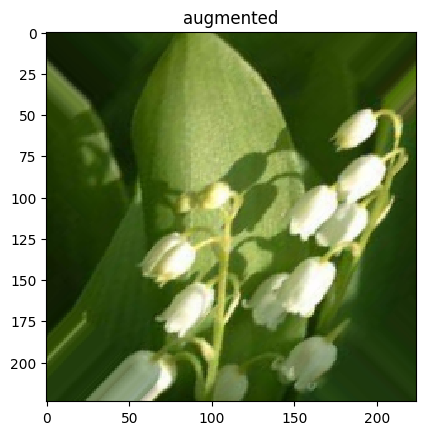

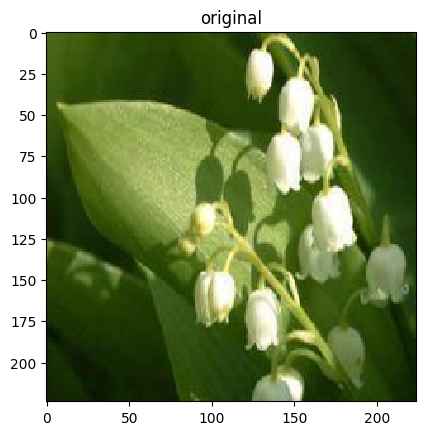

In [0]:
images, labels = train_generator.next()
plt.title("augmented")
plt.imshow(images[0])
plt.show()

plt.title("original")
images, labels = no_aug_train_generator.next()
plt.imshow(images[0])
plt.show()

In [0]:
#reset the generator
train_generator.reset()
no_aug_train_generator.reset()

In [0]:
#VGG16 architecture with batchnormalization and dropout
model = Sequential([
    #feature extraction layer
    
    #block1
    layers.Conv2D(64,(3,3),padding="same",name="block1_conv1",input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(64,(3,3),padding="same",name="block1_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block1_pool"),
    #block2
    layers.Conv2D(128,(3,3),padding="same",name="block2_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(128,(3,3),padding="same",name="block2_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block2_pool"),
    #block3
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block3_pool"),

    #block4
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block4_pool"),

    #block5
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block5_pool"),

    layers.Flatten(),
    
    #inference layer
    layers.Dense(512,name="fc1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.5),
    
    layers.Dense(512,name="fc2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),    
    layers.Dropout(0.5),
    
    layers.Dense(class_limit,name="prepredictions"),
    layers.Activation("softmax",name="predictions")
    
])

model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

Epoch 1/30
17/17 [==============================] - 18s 1s/step - loss: 1.3347 - acc: 0.4816 - val_loss: 11.8871 - val_acc: 0.2625
Epoch 2/30
17/17 [==============================] - 11s 634ms/step - loss: 0.9018 - acc: 0.6618 - val_loss: 12.2591 - val_acc: 0.1875
Epoch 3/30
17/17 [==============================] - 11s 636ms/step - loss: 0.7822 - acc: 0.7463 - val_loss: 4.0241 - val_acc: 0.5625
Epoch 4/30
17/17 [==============================] - 11s 639ms/step - loss: 0.5667 - acc: 0.7721 - val_loss: 0.9705 - val_acc: 0.6500
Epoch 5/30
17/17 [==============================] - 11s 638ms/step - loss: 0.6207 - acc: 0.8051 - val_loss: 8.1518 - val_acc: 0.3625
Epoch 6/30
17/17 [==============================] - 11s 642ms/step - loss: 0.6250 - acc: 0.7610 - val_loss: 2.9199 - val_acc: 0.5500
Epoch 7/30
17/17 [==============================] - 11s 641ms/step - loss: 0.5355 - acc: 0.8015 - val_loss: 1.1902 - val_acc: 0.5750
Epoch 8/30
17/17 [==============================] - 11s 642ms/step - l

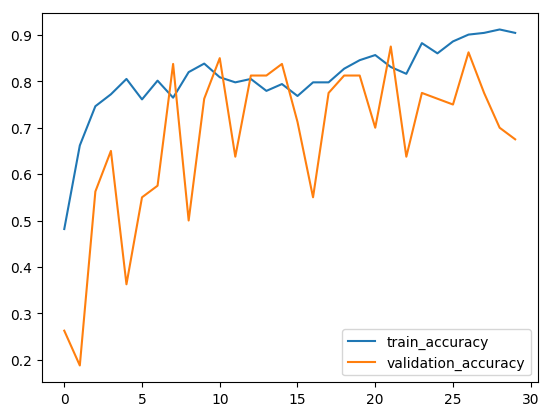

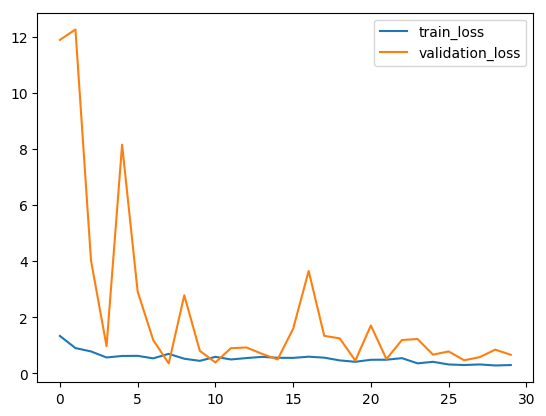

In [0]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch= train_generator.n//train_generator.batch_size +1,
                              validation_data=valid_generator,
                              validation_steps= (valid_generator.n//valid_generator.batch_size +1),
                              epochs=30)

plt.plot(history.history["acc"],label="train_accuracy")
plt.plot(history.history["val_acc"],label="validation_accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="validation_loss")
plt.legend()
plt.show()
